In [41]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from scipy.linalg import svd
from matplotlib import pyplot as plt

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [98]:
#N being O(1000)
N = 1000
# generate random numbers according to a normal distribution
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2

#generating the dataset
data = np.array([x1,x2,x3])
print(data)

[[ 1.17818733 -1.0691482   1.34388493 ... -0.53001481 -0.58354933
  -0.43516345]
 [ 2.47213921 -0.2987464   1.63437547 ... -3.65055077 -7.2894494
   2.09833332]
 [ 4.82851387 -2.43704281  4.32214532 ... -4.71058038 -8.45654806
   1.22800642]]


In [61]:
#find the eigenvectors and eigenvalues
#using eigendecomposition of the covariance matrix
cov = np.cov(data)
l, V = la.eig(cov)
l = np.real_if_close(l)

#using the SVD
U, S, Vt = svd(data)
l_svd = S**2/(N-1)
V_svd = U

# Compare Eigenvalues
print("\nCompare Eigenvalues:")
print("Eigendecomposition:\n", l)
print("SVD:\n", l_svd)

# Compare Eigenvectors
print("\nCompare Eigenvectors:")
print("Eigendecomposition:\n", V)
print("SVD:\n", V_svd)




Compare Eigenvalues:
Eigendecomposition:
 [2.89259267e+01 5.41097652e-16 2.05902267e+00]
SVD:
 [2.89539824e+01 2.06271447e+00 2.63854920e-30]

Compare Eigenvectors:
Eigendecomposition:
 [[-0.112829   -0.81649658  0.56621811]
 [-0.58064373 -0.40824829 -0.70440485]
 [-0.80630173  0.40824829  0.42803137]]
SVD:
 [[-0.1126146   0.56626079 -0.81649658]
 [-0.5809104  -0.70418495 -0.40824829]
 [-0.8061396   0.42833663  0.40824829]]


In [62]:
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(cov):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()))

Lambda:
 [[2.89259267e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.41097652e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.05902267e+00]] 

Trace(cov):
 30.984949396657257 

Trace(Lambda):
 30.98494939665726 

By selecting the component 0, we retain 0.93% of the total variability


[[ 3.06627789e-01 -1.35598699e+00  3.29269866e-01 ... -1.26950904e+00
   2.47861216e-01  1.92901123e-01]
 [-8.05781850e-01  5.05683762e-02 -4.71933379e-01 ... -3.49023108e+00
  -5.01488629e-01  1.93197502e+00]
 [-1.92526272e-01 -2.66140561e+00  1.86606353e-01 ... -6.02924916e+00
  -5.76619660e-03  2.31777726e+00]]


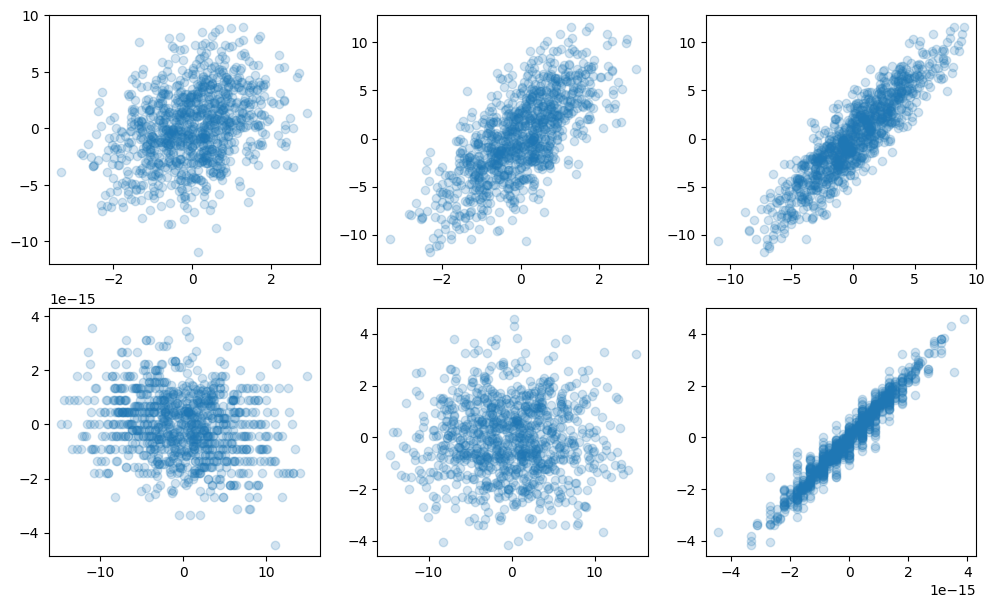

In [63]:
# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
datap = np.dot(V.T, data)
#Scale factor for vizualisation purpose
scale_factor = 3

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
fig.tight_layout()


ax1.scatter(data[0, :], data[1,:], alpha=0.2)
ax2.scatter(data[0, :], data[2,:], alpha=0.2)
ax3.scatter(data[1, :], data[2,:], alpha=0.2)

#for li, vi in zip(l_svd, V_svd.T):
#    ax1.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
#    ax2.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
#    ax3.plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    
ax4.scatter(datap[0, :], datap[1,:], alpha=0.2)
ax5.scatter(datap[0, :], datap[2,:], alpha=0.2)
ax6.scatter(datap[1, :], datap[2,:], alpha=0.2)

#for li, vi in zip(l_svd, np.dot(V_svd.T, V_svd)): # np.dot(V.T, V) is equivalent to np.diag([1]*len(l))
#    ax4.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
#    ax5.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
#    ax6.plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    

print(data)


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [107]:
#we had to each features 10 uncorrelated variables normally distributed
x1 = np.concatenate((x1, np.random.normal(0,1,10)), axis=None)
x2 = np.concatenate((x2, np.random.normal(0,1,10)), axis=None)
x3 = np.concatenate((x3, np.random.normal(0,1,10)), axis=None)
#generating the dataset
data = np.array([x1,x2,x3])
print(data)

[[ 1.17818733 -1.0691482   1.34388493 ...  0.58249174  0.3484973
   0.991626  ]
 [ 2.47213921 -0.2987464   1.63437547 ... -0.01273361  0.26390418
   0.4446397 ]
 [ 4.82851387 -2.43704281  4.32214532 ... -0.02030569 -1.02486855
  -0.31280284]]


In [108]:
#find the eigenvectors and eigenvalues
#using eigendecomposition of the covariance matrix
cov = np.cov(data)
l, V = la.eig(cov)
l = np.real_if_close(l)

#using the SVD
U, S, Vt = svd(data)
l_svd = S**2/(N-1)
V_svd = U

# Compare Eigenvalues
print("\nCompare Eigenvalues:")
print("Eigendecomposition:\n", l)
print("SVD:\n", l_svd)

# Compare Eigenvectors
print("\nCompare Eigenvectors:")
print("Eigendecomposition:\n", V)
print("SVD:\n", V_svd)


Compare Eigenvalues:
Eigendecomposition:
 [ 7.95325766 13.66223065 38.57541995]
SVD:
 [40.27188785 14.20944681  8.28492816]

Compare Eigenvectors:
Eigendecomposition:
 [[-0.78597926 -0.6141243   0.07132983]
 [-0.44127513  0.63805093  0.63100496]
 [ 0.43302754 -0.46448074  0.77249258]]
SVD:
 [[ 0.0701027  -0.6143429  -0.78591884]
 [ 0.63051295  0.63780916 -0.44232668]
 [ 0.77300649 -0.46452371  0.4320633 ]]


In [109]:
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(cov):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()))

Lambda:
 [[ 7.95325766  0.          0.        ]
 [ 0.         13.66223065  0.        ]
 [ 0.          0.         38.57541995]] 

Trace(cov):
 60.19090825752465 

Trace(Lambda):
 60.190908257524654 

By selecting the component 0, we retain 0.13% of the total variability


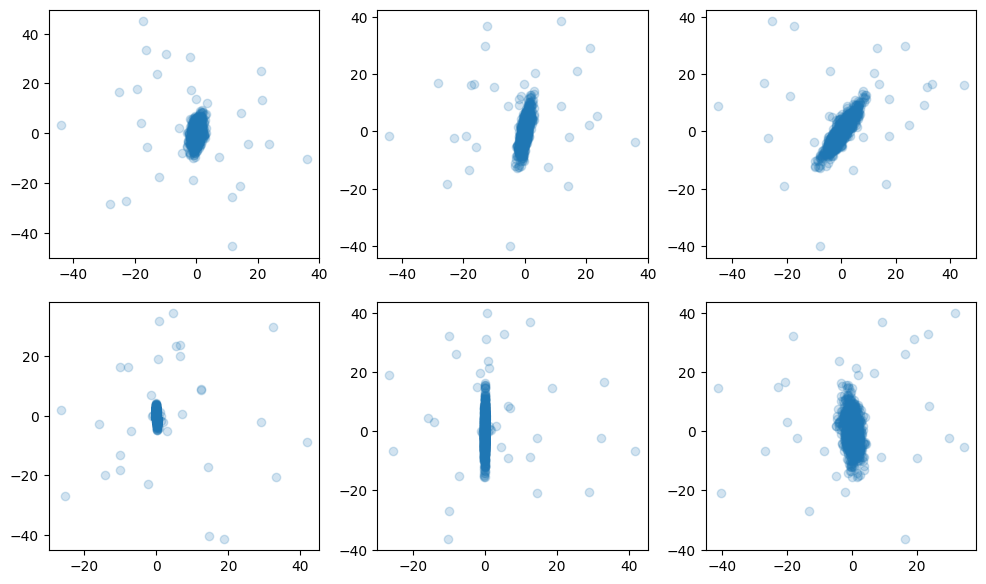

In [110]:
# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
datap = np.dot(V.T, data)
#Scale factor for vizualisation purpose
scale_factor = 3

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
fig.tight_layout()


ax1.scatter(data[0, :], data[1,:], alpha=0.2)
ax2.scatter(data[0, :], data[2,:], alpha=0.2)
ax3.scatter(data[1, :], data[2,:], alpha=0.2)

#for li, vi in zip(l_svd, V_svd.T):
#    ax1.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
#    ax2.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
#    ax3.plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    
ax4.scatter(datap[0, :], datap[1,:], alpha=0.2)
ax5.scatter(datap[0, :], datap[2,:], alpha=0.2)
ax6.scatter(datap[1, :], datap[2,:], alpha=0.2)

#for li, vi in zip(l_svd, np.dot(V_svd.T, V_svd)): # np.dot(V.T, V) is equivalent to np.diag([1]*len(l))
#    ax4.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
#    ax5.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
#    ax6.plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 